# Dementia Data Analysis 

중앙대학교병원 신경과 윤영철 교수님 치매 과제 1차 Sample 분석용 Jupyter입니다.  
작성일 : 2020년 8월 20일

## <1> Data Preprocessing

In [105]:
import pandas as pd
import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
warnings.filterwarnings('ignore')

In [106]:
data_table = pd.read_csv(r'C:\Users\pluto\OneDrive\Desktop\인공지능\머신러닝 컨퍼런스\dementia\dementia\SNSB2.csv', encoding='CP949')
data_table2 = pd.read_csv(r'C:\Users\pluto\OneDrive\Desktop\인공지능\머신러닝 컨퍼런스\dementia\dementia\SNSB2.csv', encoding='CP949')

In [107]:
# Data 정보 확인
data_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2231 entries, 0 to 2230
Data columns (total 25 columns):
Age                                2231 non-null int64
sex                                2231 non-null int64
education                          2230 non-null object
edu_years                          2231 non-null float64
Rey_CFT_copy_score                 2211 non-null float64
Rey_CFT_copy_score_p               2211 non-null float64
Alternating_square_and_triangle    2054 non-null object
Luria_loop                         2051 non-null object
K_MMSE_drawing                     2219 non-null float64
K_MMSE_drawing_p                   2219 non-null object
CDT_Contour                        737 non-null float64
CDT_Numbers                        737 non-null float64
CDT_time_setting                   737 non-null float64
CDT_Total_score                    737 non-null float64
CDT_Total_score_p                  737 non-null object
K_TMT_E_A_success                  2032 non-null obj

- <b>Total Data Row</b> : 2230개(Feature Row 제외)
- <b>결측치가 존재하는 Column</b> : Hospital No, education, Rey_CFT_copy_score, Rey_CFT_copy_score_p, Alternating_square_and_triangle, Luria_loop, K_MMSE_drawing, K_MMSE_drawing_p, CDR, Sum_of_boxes

In [108]:
# Data Sample 5개 조회
data_table.head(5)

,Age,sex,education,edu_years,Rey_CFT_copy_score,Rey_CFT_copy_score_p,Alternating_square_and_triangle,Luria_loop,K_MMSE_drawing,K_MMSE_drawing_p,...,K_TMT_E_A_success,K_TMT_E_A_error,K_TMT_E_B_success,K_TMT_E_B_error,CDR,Sum_of_boxes,SGDS,K_IADL_Score,Global_DS,Unnamed: 24
0,75,0,대졸,14.0,17.0,0.00,Normal,Normal,1.0,2.44≤,...,Success,0.0,Fail,NaN,1.0,8.0,13.0,1.90,5.0,치매
1,85,1,고중퇴,11.0,1.5,0.00,Normal,Normal,1.0,7.51≤,...,Success,0.0,Fail,NaN,1.0,6.0,8.0,1.56,4.0,치매
2,80,0,고졸,12.0,36.0,88.34,Normal,Normal,1.0,5.53≤,...,Success,0.0,Success,1.0,0.5,1.5,5.0,0.20,3.0,경도인지장애
3,75,0,초4~6년,6.0,26.0,31.10,Normal,Normal,0.0,<17.46,...,Success,0.0,Fail,NaN,0.5,2.5,2.0,NaN,3.0,NaN
4,73,0,고졸,12.0,18.0,0.00,Normal,Normal,1.0,3.31≤,...,Success,0.0,Fail,NaN,0.5,2.5,2.0,0.10,3.0,NaN


### Feature Deleting

In [109]:
# 대략적인 Data 분포 확인
data_table.describe()

,Age,sex,edu_years,Rey_CFT_copy_score,Rey_CFT_copy_score_p,K_MMSE_drawing,CDT_Contour,CDT_Numbers,CDT_time_setting,CDT_Total_score,K_TMT_E_A_error,K_TMT_E_B_error,CDR,Sum_of_boxes,SGDS,K_IADL_Score,Global_DS
count,2231.000000,2231.000000,2231.000000,2211.000000,2211.000000,2219.000000,737.000000,737.000000,737.000000,737.000000,1974.000000,1267.000000,2213.000000,2206.000000,2080.000000,1884.000000,2178.000000
mean,71.789332,0.370686,8.603541,25.252261,34.992533,0.657503,0.964722,0.618725,0.445047,2.028494,0.203141,1.149961,0.653163,3.321850,5.772115,0.707601,3.203857
std,9.917349,0.483097,5.163496,10.098891,31.799450,0.474652,0.184607,0.486030,0.497309,0.888025,0.698104,1.640596,0.346833,2.310283,4.314588,0.965661,0.933107
min,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,67.000000,0.000000,6.000000,18.500000,1.600000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.500000,2.000000,2.000000,0.100000,3.000000
50%,74.000000,0.000000,8.000000,29.000000,28.760000,1.000000,1.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.500000,2.500000,5.000000,0.370000,3.000000
75%,79.000000,1.000000,12.000000,33.375000,65.400000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,2.000000,0.500000,4.000000,9.000000,1.100000,4.000000
max,90.000000,1.000000,18.000000,36.000000,91.360000,1.000000,1.000000,1.000000,1.000000,3.000000,10.000000,15.000000,3.500000,16.000000,15.000000,26.000000,6.000000


In [110]:
# 분석에 쓰이지 않는 Feature 제거
data_table.drop(['CDT_Contour'], axis=1, inplace=True) # 분석에 의미 없음
data_table.drop(['CDT_Numbers'], axis=1, inplace=True) # 분석에 의미 없음
data_table.drop(['CDT_time_setting'], axis=1, inplace=True) # 분석에 의미 없음
data_table.drop(['CDT_Total_score'], axis=1, inplace=True) # 분석에 의미 없음
data_table.drop(['CDT_Total_score_p'], axis=1, inplace=True) # 분석에 의미 없음
data_table.drop(['K_TMT_E_A_error'], axis=1, inplace=True) # 분석에 의미 없음
data_table.drop(['K_TMT_E_B_error'], axis=1, inplace=True) # 분석에 의미 없음
data_table.drop(['SGDS'], axis=1, inplace=True) # 분석에 의미 없음
data_table.drop(['K_IADL_Score'], axis=1, inplace=True) # 분석에 의미 없음
data_table.drop(['Global_DS'], axis=1, inplace=True) # 분석에 의미 없음
data_table.drop(['Rey_CFT_copy_score_p'], axis=1, inplace=True) # 분석에 의미 없음
data_table.drop(['education'], axis=1, inplace=True) # edu_y
data_table.drop(['K_MMSE_drawing_p'], axis=1, inplace=True)
data_table.drop(['Unnamed: 24'], axis=1, inplace=True)

data_table.head(3)

,Age,sex,edu_years,Rey_CFT_copy_score,Alternating_square_and_triangle,Luria_loop,K_MMSE_drawing,K_TMT_E_A_success,K_TMT_E_B_success,CDR,Sum_of_boxes
0,75,0,14.0,17.0,Normal,Normal,1.0,Success,Fail,1.0,8.0
1,85,1,11.0,1.5,Normal,Normal,1.0,Success,Fail,1.0,6.0
2,80,0,12.0,36.0,Normal,Normal,1.0,Success,Success,0.5,1.5


## Data Encoding
<b>Encoding 할 Feature</b> : Alternating_square_and_triangle, Luria_loop  
<b>Object Dtype</b> : education, Alternating_square_and_triangle, Luria_loop, K_MMSE_drawing_p	

In [111]:
#map_asat = {'Deform&PSV':0, 'Deformed':1, 'None':2, 'Normal':3, 'PSV':4}
#col = ['Alternating_square_and_triangle']

#data_table[col]=data_table[col].applymap(map_asat.get)
#data_table.dropna(subset=['Alternating_square_and_triangle'], inplace=True)

In [112]:
#sns.countplot(data_table['Alternating_square_and_triangle'])

In [113]:
#col = ['Luria_loop']
#data_table[col]=data_table[col].applymap(map_asat.get)
#data_table.dropna(subset=['Luria_loop'], inplace=True)

In [114]:
#sns.countplot(data_table['Luria_loop'])

In [115]:
data_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2231 entries, 0 to 2230
Data columns (total 11 columns):
Age                                2231 non-null int64
sex                                2231 non-null int64
edu_years                          2231 non-null float64
Rey_CFT_copy_score                 2211 non-null float64
Alternating_square_and_triangle    2054 non-null object
Luria_loop                         2051 non-null object
K_MMSE_drawing                     2219 non-null float64
K_TMT_E_A_success                  2032 non-null object
K_TMT_E_B_success                  1780 non-null object
CDR                                2213 non-null float64
Sum_of_boxes                       2206 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 191.9+ KB


## Feature 상관관계 히트맵

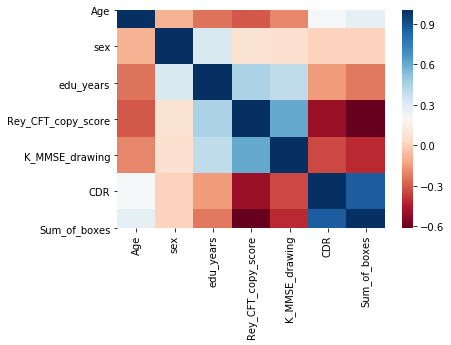

In [116]:
# 피처 상관관계 히트맵
corr = data_table.corr()
sns.heatmap(corr, cmap='RdBu')

## 결측치 채우기 - K_MMSE_AVG

K_MMSE_drawing 피처의 경우 결측지가 존재하면 그 행 데이터를 삭제하기로 한다. 그 이유는 아래와 같다.  
- 피처 상관관계가 높은 연령대 데이터를 바탕으로 연령대별 K_MMSE_drawing을 수치화시키고 이를 0 혹은 1로 근사하였다. 결과와 같이 모두 '1'이어서 의미가 없다.
- 결측치가 있는 데이터가 12개 밖에 되지 않는다.

In [117]:
k_mmse_avg_40 = data_table[data_table['Age']<50]['K_MMSE_drawing'].mean()
k_mmse_avg_50 = data_table[(data_table['Age']>=50) & (data_table['Age']<60)]['K_MMSE_drawing'].mean()
k_mmse_avg_60 = data_table[(data_table['Age']>=60) & (data_table['Age']<70)]['K_MMSE_drawing'].mean()
k_mmse_avg_70 = data_table[(data_table['Age']>=70) & (data_table['Age']<80)]['K_MMSE_drawing'].mean()
k_mmse_avg_8090 = data_table[(data_table['Age']>=80) & (data_table['Age']<=90)]['K_MMSE_drawing'].mean()

print("연령대 별 평균 K_MMSE 수치 : ", k_mmse_avg_40, k_mmse_avg_50,k_mmse_avg_60,k_mmse_avg_70,k_mmse_avg_8090)
print("연령대 별 평균 K_MMSE 이진화 : ", round(k_mmse_avg_40), round(k_mmse_avg_50),round(k_mmse_avg_60),round(k_mmse_avg_70),round(k_mmse_avg_8090))

#data_table[data_table['Age']<60]['K_MMSE_drawing'].fillna(k_mmse_avg_4050, inplace = True)
#data_table[(data_table['Age']>=60) & (data_table['Age']<70)]['K_MMSE_drawing'].fillna(k_mmse_avg_60, inplace = True)
#data_table[(data_table['Age']>=70) & (data_table['Age']<80)]['K_MMSE_drawing'].fillna(k_mmse_avg_70, inplace = True)
#data_table[(data_table['Age']>=80) & (data_table['Age']<=90)]['K_MMSE_drawing'].fillna(k_mmse_avg_8090, inplace = True)

#'K_MMSE_drawing' 칼럼에 결측치가 있는 경우 행 제거
data_table.dropna(subset=['K_MMSE_drawing'], inplace=True)

연령대 별 평균 K_MMSE 수치 :  0.8831168831168831 0.7920353982300885 0.7582417582417582 0.6112852664576802 0.5595238095238095
연령대 별 평균 K_MMSE 이진화 :  1 1 1 1 1


## 결측치 채우기 - Rey_CRT_copy_score

In [118]:
Rey_score_40 = data_table[(data_table['Age']<50)]['Rey_CFT_copy_score'].mean()
print("40대: ", Rey_score_40)
Rey_score_50 = data_table[(data_table['Age']<60) & (data_table['Age']>=50) ]['Rey_CFT_copy_score'].mean()
print("50대: ", Rey_score_50)
Rey_score_60= data_table[(data_table['Age']<70) & (data_table['Age']>=60)]['Rey_CFT_copy_score'].mean()
print("60대: ", Rey_score_60)
Rey_score_70= data_table[(data_table['Age']<80) & (data_table['Age']>=70)]['Rey_CFT_copy_score'].mean()
print("70대: ", Rey_score_70)
Rey_score_8090 = data_table[(data_table['Age']<=90) & (data_table['Age']>=80)]['Rey_CFT_copy_score'].mean()
print("80~90대: ", Rey_score_8090)

data_table2[(data_table2['Age']<50)&(data_table2['Rey_CFT_copy_score'].isnull()==True)]=Rey_score_40
data_table2[(data_table2['Age']<60) & (data_table2['Age']>=50)&(data_table2['Rey_CFT_copy_score'].isnull()==True) ]=Rey_score_50
data_table2[(data_table2['Age']<70) & (data_table2['Age']>=60)&(data_table2['Rey_CFT_copy_score'].isnull()==True) ]=Rey_score_60
data_table2[(data_table2['Age']<80) & (data_table2['Age']>=70)&(data_table2['Rey_CFT_copy_score'].isnull()==True) ]=Rey_score_70
data_table2[(data_table2['Age']<=90) & (data_table2['Age']>=80)&(data_table2['Rey_CFT_copy_score'].isnull()==True) ]=Rey_score_8090

data_table['Rey_CFT_copy_score']=round(data_table2['Rey_CFT_copy_score']) 
print(data_table['Rey_CFT_copy_score'].isnull().sum())

40대:  31.071428571428573
50대:  29.548672566371682
60대:  28.422737306843267
70대:  24.379210526315788
80~90대:  21.139
0


## 결측치 채우기& 이진화 -Alternating_square_and_triangle

In [119]:
def get_ast(t):
    if t=='Normal': t=1
    elif t=='Deformed': t=0
    elif t=='Deform&PSV': t=0
    elif t=='PSV': t=0
    elif t=='N/A': t=''
    else : t=''
        
    return t

data_table['Alternating_square_and_triangle']= data_table['Alternating_square_and_triangle'].apply(lambda x: get_ast(x))
data_table['Alternating_square_and_triangle'] = data_table['Alternating_square_and_triangle'].apply(pd.to_numeric, errors='coerce')

In [120]:
ast_0 = data_table[(data_table['Rey_CFT_copy_score']<10)]['Alternating_square_and_triangle'].mean()
ast_10 = data_table[(data_table['Rey_CFT_copy_score']>=10) & (data_table['Rey_CFT_copy_score']<20)]['Alternating_square_and_triangle'].mean()
ast_20 = data_table[(data_table['Rey_CFT_copy_score']>=20) & (data_table['Rey_CFT_copy_score']<30)]['Alternating_square_and_triangle'].mean()
ast_30 = data_table[(data_table['Rey_CFT_copy_score']>=30) & (data_table['Rey_CFT_copy_score']<40)]['Alternating_square_and_triangle'].mean()
data_table2['Alternating_square_and_triangle']=data_table['Alternating_square_and_triangle']
print("Rey_CFT_copy_score별 평균 Alternating_square_and_triangle 수치 : ", ast_0, ast_10,ast_20,ast_30)
print("Rey_CFT_copy_score별 평균 Alternating_square_and_triangle 이진화 : ", round(ast_0), round(ast_10),round(ast_20),round(ast_30))

Rey_CFT_copy_score별 평균 Alternating_square_and_triangle 수치 :  0.23478260869565218 0.5045317220543807 0.8472222222222222 0.9564336372847011
Rey_CFT_copy_score별 평균 Alternating_square_and_triangle 이진화 :  0 1 1 1


In [121]:
data_table2[(data_table2['Rey_CFT_copy_score']<10)&(data_table2['Alternating_square_and_triangle'].isnull()==True)]=ast_0
data_table2[(data_table2['Rey_CFT_copy_score']<20) & (data_table2['Rey_CFT_copy_score']>=10)&(data_table2['Alternating_square_and_triangle'].isnull()==True) ]=ast_10
data_table2[(data_table2['Rey_CFT_copy_score']<30) & (data_table2['Rey_CFT_copy_score']>=20)&(data_table2['Alternating_square_and_triangle'].isnull()==True) ]=ast_20
data_table2[(data_table2['Rey_CFT_copy_score']<40) & (data_table2['Rey_CFT_copy_score']>=30)&(data_table2['Alternating_square_and_triangle'].isnull()==True) ]=ast_30
data_table['Alternating_square_and_triangle']=round(data_table2['Alternating_square_and_triangle'])

## 결측치 채우기& 이진화- Lurial loop

In [122]:
data_table2 = pd.read_csv(r'C:\Users\pluto\OneDrive\Desktop\인공지능\머신러닝 컨퍼런스\dementia\dementia\SNSB2.csv', encoding='CP949')
data_table['Luria_loop']= data_table['Luria_loop'].apply(lambda x: get_ast(x))
data_table['Luria_loop']=data_table['Luria_loop'].apply(pd.to_numeric, errors='coerce')

In [123]:
llp_0 = data_table[data_table['Rey_CFT_copy_score']<10]['Luria_loop'].mean()
llp_10 = data_table[(data_table['Rey_CFT_copy_score']>=10) & (data_table['Rey_CFT_copy_score']<20)]['Luria_loop'].mean()
llp_20 = data_table[(data_table['Rey_CFT_copy_score']>=20) & (data_table['Rey_CFT_copy_score']<30)]['Luria_loop'].mean()
llp_30 = data_table[(data_table['Rey_CFT_copy_score']>=30) & (data_table['Rey_CFT_copy_score']<40)]['Luria_loop'].mean()
data_table2['Luria_loop']= data_table['Luria_loop']
data_table2['Rey_CFT_copy_score'] = data_table['Rey_CFT_copy_score']
print("연령대 별 평균 Luria_loop 수치 : ", llp_0, llp_10,llp_20,llp_30)
print("연령대 별 평균 Luria_loop 이진화 : ", round(llp_0), round(llp_10),round(llp_20),round(llp_30))

연령대 별 평균 Luria_loop 수치 :  0.27467811158798283 0.5075528700906344 0.8323353293413174 0.9613821138211383
연령대 별 평균 Luria_loop 이진화 :  0 1 1 1


In [124]:
data_table2[(data_table2['Rey_CFT_copy_score']<10) & (data_table2['Luria_loop'].isnull()==True)]=llp_0
data_table2[(data_table2['Rey_CFT_copy_score']<20) & (data_table2['Rey_CFT_copy_score']>=10)&(data_table2['Luria_loop'].isnull()==True) ]=llp_10
data_table2[(data_table2['Rey_CFT_copy_score']<30) & (data_table2['Rey_CFT_copy_score']>=20)&(data_table2['Luria_loop'].isnull()==True) ]=llp_20
data_table2[(data_table2['Rey_CFT_copy_score']<40) & (data_table2['Rey_CFT_copy_score']>=30)&(data_table2['Luria_loop'].isnull()==True) ]=llp_30
data_table['Luria_loop']=round(data_table2['Luria_loop'])

## 결측치 채우기& 이진화- K_TMT_E_A_success

In [125]:
def get_tmta(t):
    if t=='Success': t=1
    elif t=='Fail': t=0
    elif t=='N/A': t=''
    else : t=''
        
    return t
     
data_table2 = pd.read_csv(r'C:\Users\pluto\OneDrive\Desktop\인공지능\머신러닝 컨퍼런스\dementia\dementia\SNSB2.csv', encoding='CP949')
data_table['K_TMT_E_A_success']= data_table['K_TMT_E_A_success'].apply(lambda x: get_tmta(x))
data_table['K_TMT_E_A_success']=data_table['K_TMT_E_A_success'].apply(pd.to_numeric, errors='coerce')

In [126]:
tmtea_0 = data_table[data_table['Rey_CFT_copy_score']<10]['K_TMT_E_A_success'].mean()
tmtea_10 = data_table[(data_table['Rey_CFT_copy_score']>=10) & (data_table['Rey_CFT_copy_score']<20)]['K_TMT_E_A_success'].mean()
tmtea_20 = data_table[(data_table['Rey_CFT_copy_score']>=20) & (data_table['Rey_CFT_copy_score']<30)]['K_TMT_E_A_success'].mean()
tmtea_30 = data_table[(data_table['Rey_CFT_copy_score']>=30) & (data_table['Rey_CFT_copy_score']<40)]['K_TMT_E_A_success'].mean()
data_table2['K_TMT_E_A_success']= data_table['K_TMT_E_A_success']
data_table2['Rey_CFT_copy_score'] = data_table['Rey_CFT_copy_score']
print("연령대 별 평균 K_TMT_E_A_success 수치 : ", tmtea_0, tmtea_10,tmtea_20,tmtea_30)
print("연령대 별 평균 K_TMT_E_A_success 이진화 : ", round(tmtea_0), round(tmtea_10),round(tmtea_20),round(tmtea_30))

연령대 별 평균 K_TMT_E_A_success 수치 :  0.7409326424870466 0.94375 0.9961389961389961 1.0
연령대 별 평균 K_TMT_E_A_success 이진화 :  1 1 1 1


In [127]:
data_table2[(data_table2['Rey_CFT_copy_score']<10) & (data_table2['K_TMT_E_A_success'].isnull()==True)]=tmtea_0
data_table2[(data_table2['Rey_CFT_copy_score']<20) & (data_table2['Rey_CFT_copy_score']>=10)&(data_table2['K_TMT_E_A_success'].isnull()==True) ]=tmtea_10
data_table2[(data_table2['Rey_CFT_copy_score']<30) & (data_table2['Rey_CFT_copy_score']>=20)&(data_table2['K_TMT_E_A_success'].isnull()==True) ]=tmtea_20
data_table2[(data_table2['Rey_CFT_copy_score']<40) & (data_table2['Rey_CFT_copy_score']>=30)&(data_table2['K_TMT_E_A_success'].isnull()==True) ]=tmtea_30
data_table['K_TMT_E_A_success']=round(data_table2['K_TMT_E_A_success'])

## 결측치 채우기& 이진화- K_TMT_E_B_success

In [128]:
data_table2 = pd.read_csv(r'C:\Users\pluto\OneDrive\Desktop\인공지능\머신러닝 컨퍼런스\dementia\dementia\SNSB2.csv', encoding='CP949')
def get_tmtb(t):
    if t=='Success': t=1
    elif t=='Fail': t=0
    elif t==0 : t=0
    elif t=='N/A': t=''
    else : t=''
        
    return t

data_table2[(data_table2['K_TMT_E_A_success']=='Fail') &(data_table['K_TMT_E_B_success'].isnull()==True)]=0
data_table['K_TMT_E_B_success'] = data_table2['K_TMT_E_B_success']
data_table['K_TMT_E_B_success']= data_table['K_TMT_E_B_success'].apply(lambda x: get_tmtb(x))
data_table['K_TMT_E_B_success']= data_table['K_TMT_E_B_success'].apply(pd.to_numeric, errors='coerce')

In [129]:
tmteb_0 = data_table[data_table['K_TMT_E_A_success']==0]['K_TMT_E_B_success'].mean()
tmteb_1 = data_table[data_table['K_TMT_E_A_success']==1]['K_TMT_E_B_success'].mean()
data_table2['K_TMT_E_B_success']= data_table['K_TMT_E_B_success']
data_table2['K_TMT_E_A_success']= data_table['K_TMT_E_A_success']
print("연령대 별 평균 K_TMT_E_B_success 수치 : ", tmteb_0, tmteb_1)
print("연령대 별 평균 K_TMT_E_B_success 이진화 : ", round(tmteb_0), round(tmteb_1))

연령대 별 평균 K_TMT_E_B_success 수치 :  0.0 0.6836158192090396
연령대 별 평균 K_TMT_E_B_success 이진화 :  0 1


In [130]:
data_table2[(data_table['K_TMT_E_A_success']==0) & (data_table2['K_TMT_E_B_success'].isnull()==True)]=tmteb_0
data_table2[(data_table2['K_TMT_E_A_success']==1) & (data_table2['K_TMT_E_B_success'].isnull()==True) ]=tmteb_1
data_table['K_TMT_E_B_success']=round(data_table2['K_TMT_E_B_success'])

# 여기까지 결측치 채워넣음

## 데이터 분포 확인

In [131]:
data_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2219 entries, 0 to 2230
Data columns (total 11 columns):
Age                                2219 non-null int64
sex                                2219 non-null int64
edu_years                          2219 non-null float64
Rey_CFT_copy_score                 2219 non-null float64
Alternating_square_and_triangle    2219 non-null float64
Luria_loop                         2219 non-null float64
K_MMSE_drawing                     2219 non-null float64
K_TMT_E_A_success                  2219 non-null float64
K_TMT_E_B_success                  2219 non-null float64
CDR                                2212 non-null float64
Sum_of_boxes                       2205 non-null float64
dtypes: float64(9), int64(2)
memory usage: 288.0 KB


In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

data_table.head(5)

,Age,sex,edu_years,Rey_CFT_copy_score,Alternating_square_and_triangle,Luria_loop,K_MMSE_drawing,K_TMT_E_A_success,K_TMT_E_B_success,CDR,Sum_of_boxes
0,75,0,14.0,17.0,1.0,1.0,1.0,1.0,0.0,1.0,8.0
1,85,1,11.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,6.0
2,80,0,12.0,36.0,1.0,1.0,1.0,1.0,1.0,0.5,1.5
3,75,0,6.0,26.0,1.0,1.0,0.0,1.0,0.0,0.5,2.5
4,73,0,12.0,18.0,1.0,1.0,1.0,1.0,0.0,0.5,2.5


In [133]:
data_table.dropna(subset=['CDR'], inplace=True)
data_table.info()
data_table.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2230
Data columns (total 11 columns):
Age                                2212 non-null int64
sex                                2212 non-null int64
edu_years                          2212 non-null float64
Rey_CFT_copy_score                 2212 non-null float64
Alternating_square_and_triangle    2212 non-null float64
Luria_loop                         2212 non-null float64
K_MMSE_drawing                     2212 non-null float64
K_TMT_E_A_success                  2212 non-null float64
K_TMT_E_B_success                  2212 non-null float64
CDR                                2212 non-null float64
Sum_of_boxes                       2205 non-null float64
dtypes: float64(9), int64(2)
memory usage: 207.4 KB


Age                                0
sex                                0
edu_years                          0
Rey_CFT_copy_score                 0
Alternating_square_and_triangle    0
Luria_loop                         0
K_MMSE_drawing                     0
K_TMT_E_A_success                  0
K_TMT_E_B_success                  0
CDR                                0
Sum_of_boxes                       7
dtype: int64

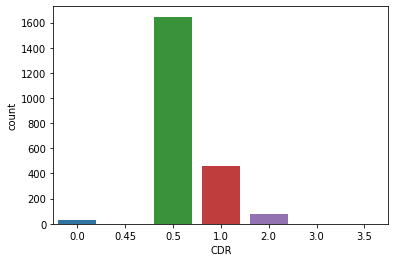

In [134]:
sns.countplot(data_table['CDR'])

In [135]:
def CDR_class(CDR):
    degree = ''
    if CDR == 0 : degree = '0'
    elif (CDR == 0.45)|(CDR == 0.5)  : degree = '1'
    elif (CDR == 1)|(CDR == 2)|(CDR == 3)|(CDR == 3.5) : degree = '2'
        
    return degree

In [136]:
data_table['CDR'] = data_table['CDR'].apply(lambda x : CDR_class(x))
data_table.head(5)

,Age,sex,edu_years,Rey_CFT_copy_score,Alternating_square_and_triangle,Luria_loop,K_MMSE_drawing,K_TMT_E_A_success,K_TMT_E_B_success,CDR,Sum_of_boxes
0,75,0,14.0,17.0,1.0,1.0,1.0,1.0,0.0,2,8.0
1,85,1,11.0,2.0,1.0,1.0,1.0,1.0,0.0,2,6.0
2,80,0,12.0,36.0,1.0,1.0,1.0,1.0,1.0,1,1.5
3,75,0,6.0,26.0,1.0,1.0,0.0,1.0,0.0,1,2.5
4,73,0,12.0,18.0,1.0,1.0,1.0,1.0,0.0,1,2.5


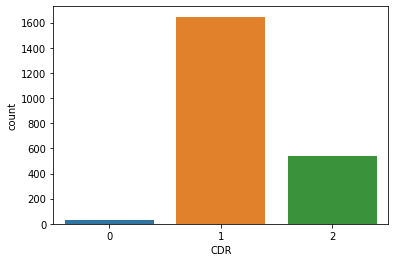

In [137]:
sns.countplot(data_table['CDR'])

In [138]:
print('CDR 값 분포 :\n', data_table['CDR'].value_counts())

CDR 값 분포 :
 1    1647
2     537
0      28
Name: CDR, dtype: int64


In [139]:
from sklearn.model_selection import train_test_split

label = data_table['CDR']
data = data_table.drop('CDR', axis=1)
data= data.drop('Sum_of_boxes', axis=1)
data_train, data_test, label_train, label_test = train_test_split(data, label, test_size=0.2, random_state=8)
data.isnull().sum()

Age                                0
sex                                0
edu_years                          0
Rey_CFT_copy_score                 0
Alternating_square_and_triangle    0
Luria_loop                         0
K_MMSE_drawing                     0
K_TMT_E_A_success                  0
K_TMT_E_B_success                  0
dtype: int64

In [140]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [141]:
lr = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=8)

voting = VotingClassifier(estimators=[('LR', lr), ('KNN', knn)], voting='soft')

In [142]:
voting.fit(data_train, label_train)
pred = voting.predict(data_test)
print('Voting Classifier Accuracy: {0:.4f}'.format(accuracy_score(label_test, pred)))

Voting Classifier Accuracy: 0.7946


In [143]:
classifiers = [lr, knn]
for clf in classifiers :
    clf.fit(data_train, label_train)
    pred = clf.predict(data_test)
    clf_name = clf.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(clf_name, accuracy_score(label_test, pred)))

LogisticRegression 정확도: 0.7946
KNeighborsClassifier 정확도: 0.7901


In [145]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)
rf.fit(data_train, label_train)
pred = rf.predict(data_test)

print('Random Forest Accuracy: {0:.4f}'.format(accuracy_score(label_test, pred)))

Random Forest Accuracy: 0.7833


In [147]:
from sklearn.model_selection import GridSearchCV

params = { 
    'n_estimators':[100],
    'max_depth':[6, 8, 10, 12],
    'min_samples_leaf':[8, 12, 18],
    'min_samples_split':[8, 16, 20]
             }

rf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(data_train, label_train)

print('Best Hyper Parameter:\n', grid_cv.best_params_)
print('Best Accuracy: {0:.4f}'.format(grid_cv.best_score_))

Best Hyper Parameter:
 {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
Best Accuracy: 0.7988


In [151]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

lgbm = LGBMClassifier(n_estimators=400)

#조기 중단 수행
lgbm.fit(data_train, label_train, early_stopping_rounds=100, eval_metric='auc', eval_set=[(data_test, label_test)], verbose=True)

LightGBMError: Multiclass objective and metrics don't match

## Age Normalization

추후 작업 예정, 추가로 Rey_CFT_copy_score을 작업하면 좋을 듯함

## CDR Engineering

0, 0.45, 0.5 는 0으로, 1, 2, 3, 3.5 는 1로 교체

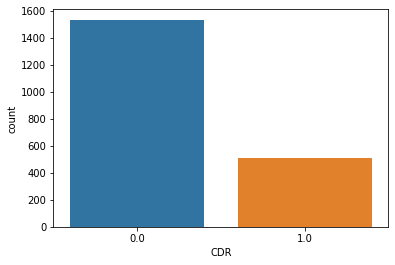

In [34]:
data_table['CDR'] = data_table['CDR'].replace([0, 0.45, 0.5], 0)
data_table['CDR'] = data_table['CDR'].replace([2,3,3.5], 1)
sns.countplot(x="CDR", data=data_table)

In [35]:
from sklearn.model_selection import train_test_split
X = data_table.iloc[:,:-1]
y = data_table.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=10)

print(y_train.value_counts()/y_train.shape[0]*100)
print(y_test.value_counts()/y_test.shape[0]*100)

0.0    75.980392
1.0    24.019608
Name: CDR, dtype: float64
0.0    73.039216
1.0    26.960784
Name: CDR, dtype: float64


## Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# DecisionTree 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

DecisionTreeClassifier 정확도 : 0.6912


In [37]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [2, 4, 6, 8, 10, 12],
                        'min_samples_split' : [2, 3, 4, 5],
                         'min_samples_leaf' : [1, 3, 5, 7, 9]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print("GridSearch 최적 하이퍼 파라미터: ", grid_dclf.best_params_)
print("GridSearch 최고 정확도:{:.4f} ".format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearch의 최적 하이퍼파라미터로 학습된 Estimator로 예측 및 평가 수행
predictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('튜닝 후 예측 정확도: {0:.4f}'.format(accuracy))

GridSearch 최적 하이퍼 파라미터:  {'max_depth': 4, 'min_samples_leaf': 9, 'min_samples_split': 2}
GridSearch 최고 정확도:0.8158 
튜닝 후 예측 정확도: 0.7745


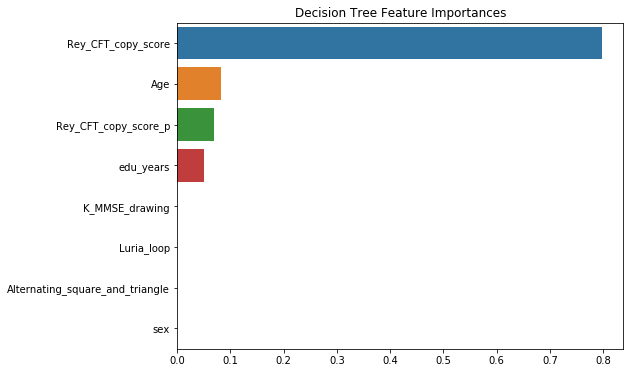

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

feature_importance_values = best_dclf.feature_importances_
# Top 중요도로 정렬하고, 쉽게 시각화하기 위해 Series 변환
feature_importances = pd.Series(feature_importance_values, index=X_train.columns)
# 중요도값 순으로 Series를 정렬
feature_top20 = feature_importances.sort_values(ascending=False)[:]

plt.figure(figsize=[8, 6])
plt.title('Decision Tree Feature Importances')
sns.barplot(x=feature_top20, y=feature_top20.index)
plt.show()

## Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=11)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.7696


In [40]:
params = {
    'n_estimators':[50,100,200],
    'max_depth' : [2,4,6,8],
    'min_samples_leaf' : [18,24,30],
    'min_samples_split' : [4, 8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=11, n_jobs=-11)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=5, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 6, 'min_samples_leaf': 18, 'min_samples_split': 4, 'n_estimators': 200}
최고 예측 정확도: 0.8221


## Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=11)
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('로지스틱 회귀 정확도: {0:.4f}'.format(accuracy))

로지스틱 회귀 정확도: 0.7778


In [45]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
best_lrclf = GridSearchCV(lr_clf, hyperparameters, cv=5, verbose=0)
best_model = best_lrclf.fit(X_train, y_train)
best_lrclf.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n',best_lrclf.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(best_lrclf.best_score_))

최적 하이퍼 파라미터:
 {'C': 1.0, 'penalty': 'l2'}
최고 예측 정확도: 0.8214


In [46]:
pred = best_model.predict(X_test)
print('튜닝 후 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

pred = lr_clf.predict(X_test)
print('튜닝 전 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

튜닝 후 예측 정확도: 0.7778
튜닝 전 예측 정확도: 0.7778
